# Trabalho 4 de Aprendizado de Máquina

Trabalho sobre K-Means, PCA e Árvores de Decisão.

- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Módulos utilizados neste trabalho
from modules import cluster, tree
from modules import decomposition as decomp

# Módulos do Trabalho 3 utilizados neste trabalho
import sys
sys.path.insert(1, '../Trabalho 3/modules/')
import utils as utils_trab3

## Conjunto de dados
### 1. Leitura do conjunto de dados: ``` data_trab4 ```

In [2]:
df = pd.DataFrame(columns=['X_0', 'X_1', 'X_2', 'X_3', 'y'])

with open('data_trab4/trab4_data.txt', 'r') as f: 
    for line in f:
        try:
            line = float(line)
        except ValueError:
            pass
        split_line = line.split(',')
        df = df.append({
            'X_0': float(split_line[0]),
            'X_1': float(split_line[1]),
            'X_2': float(split_line[2]),
            'X_3': float(split_line[3]),
            'y':   float(split_line[4])
        }, ignore_index=True)
        
df.head()

,X_0,X_1,X_2,X_3,y
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


### 2. e 3. X e y

As quatro primeiras colunas são as características (X, *features* das instâncias) e a última coluna é a variável alvo (y).

In [3]:
X = df.values[:, :-1]
y = df.values[:, -1]

X.shape, y.shape

((150, 4), (150,))

#### Dados sem normalização

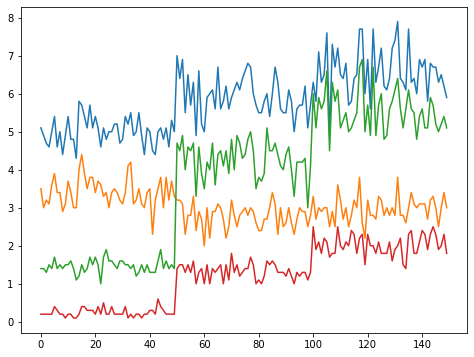

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.plot(X);

#### Dados normalizados

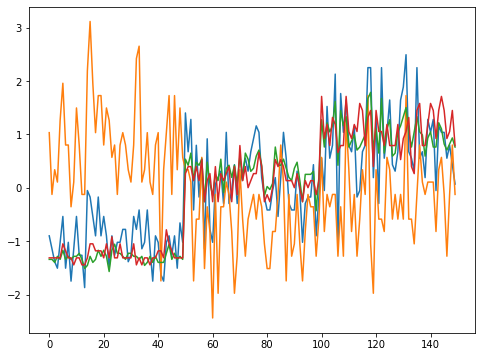

In [5]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

fig = plt.figure(figsize=(8, 6))
plt.plot(X);

## K-Means

### 1. Implementação

Foi criado o módulo ``` cluster ``` para guardar a implementação do **K-Means** usando a distância Euclidiana. O módulo também contém uma função para visualização dos *clusters* e do Método do Cotovelo. 

O import desse arquivo foi feito acima a partir do seguinte comando: ``` from modules import clusters ```. A função ```plot_data```do Trabalho 3 também é usada para análise do **K-Means**.

### 2. Executando o K-Means para *k* = {2, 3, 4, 5}
 
#### a. *Plot* dos *clusters* formados e seus centroides, e da distância média de cada ponto para o seu centroide (em função de *k*).

Quantidade de iterações solicitadas: 20.

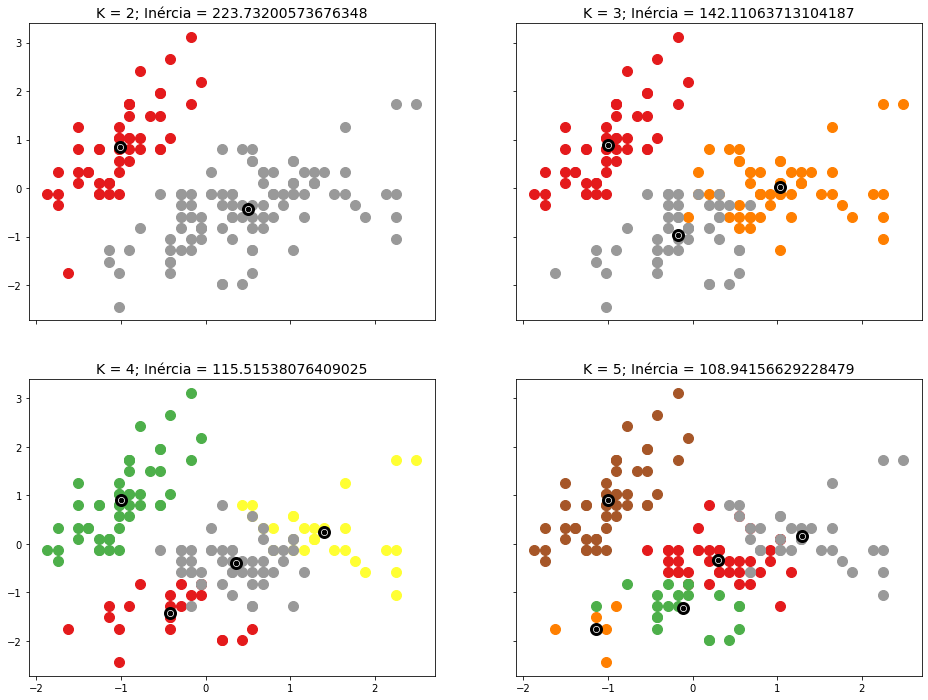

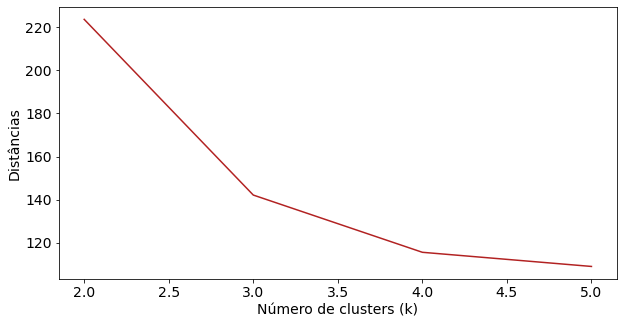

In [6]:
cluster.kmeans_elbow_visualizer(X, k_range=[2, 3, 4, 5], max_iter=20)

#### Qual seria o número ideial de *clusters* (*k*)?

1. Analisando o gráfico de linha em função de *k*, o valor 3 seria o *k* ideal (``n_clusters``) para ser usado como hiper-parâmetro. 
2. De acordo com o Método do Cotovelo apresentado em aula, as distâncias para o *k* com valor 4 ou 5 estão muito próximas, e a quebra pode ser visivelmente identificada no *k* com valor igual a 3.
2. As afirmações acima também pode ser verificadas com a análise do gráfico para o *k* = 3 com os *clusters* formados, e que se parece um pouco com a distribuição original do X e do y, plotada a seguir.

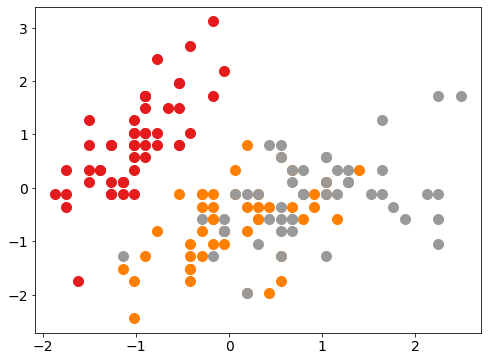

In [7]:
utils_trab3.plot_data(X, y)

## PCA

### 1. Implementação

Foi criado o módulo ``` decomposition ``` para guardar a implementação do **PCA**. O módulo também contém a função que calcula a matriz de covariância, e uma função que plota um gráfico de linha com as proporções de variância. 

O import desse arquivo foi feito acima a partir do seguinte comando: ``` from modules import decomposition as decomp ```. A função ```plot_data```do Trabalho 3 também é usada para a análise do **PCA**.

### 2. Reduzindo o conjunto de dados original em um conjunto com apenas duas variáveis

2 componentes principais de maior autovalor.

In [8]:
#Comparação da função que calcula a matriz de variância feita por mim com a do Numpy
decomp.cov_matrix(X) == np.cov(X.T)

array([[ True, False,  True,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [9]:
pca = decomp.PCA(n_components=2) # 2 componentes
pca.fit(X)

#### a. Quanto de variância que foi preservado?

- Analisando o gráfico abaixo, que contém os valores das proporções de variância para cada dimensão, o primeiro componente principal já vale 95% da variância, enquanto que o primeiro e segundo componentes (```n_components=2```), passados como hiper-parâmetro no método, contam com quase 100% da variância. 

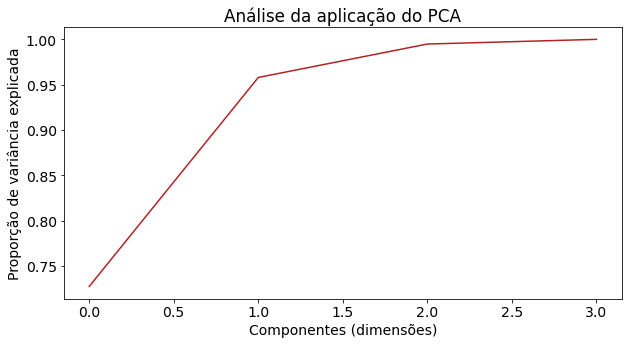

In [10]:
decomp.plot_variance_explained(pca.proportion_variance_explained)

#### b. *Plot* de cada ponto do conjunto transformado em um gráfico de dispersão 2d

Número de atributos antes do PCA: 4


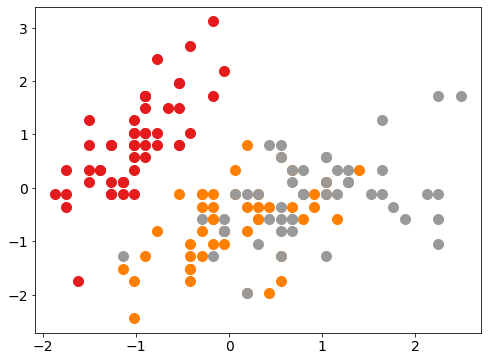

In [11]:
print("Número de atributos antes do PCA: {}".format(X.shape[1]))
utils_trab3.plot_data(X, y)

Número de atributos após o PCA: 2


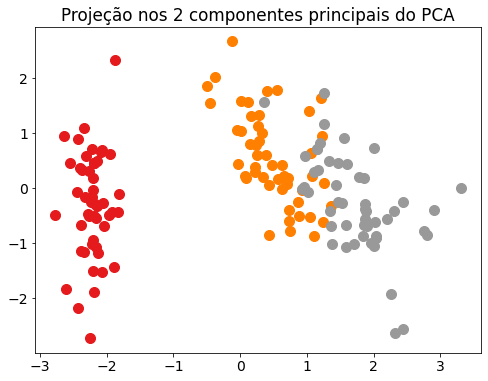

In [12]:
X_ = pca.transform(X)

print("Número de atributos após o PCA: {}".format(X_.shape[1]))
utils_trab3.plot_data(X_, y, title="Projeção nos 2 componentes principais do PCA")

## Árvores de Decisão

### 1. Implementação

Foi criado o módulo ``` tree ``` para guardar a implementação do modelo **DecisionTreeClassifier**. O módulo também contém a classe ``` Node``` para criação dos nós da árvore de decisão.

O import desse arquivo foi feito acima a partir do seguinte comando: ``` from modules import tree```. Como pedido na descrição do trabalho, resolvi usar a função ```k_fold```do Trabalho 3 implementada por mim. Também são usadas as funções ```accuracy_score``` e ```plot_confusion_matrix``` do Trabalho 3.

#### Comparação rápida entre o modelo implementado neste trabalho e o DecisionTreeClassifier do *Scikit-learn*

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

clf2 = DecisionTreeClassifier() # Sklearn
clf2.fit(X_train, y_train)
y_pred_ = clf2.predict(X_test)

print("Acurácia para o modelo do Trabalho 4: {}\nAcurácia para o modelo do Sklearn: {}\nMax_depth sugerido pelo Sklearn: {}".format(utils_trab3.accuracy_score(y_test, y_pred), 
                                                                                                                                    utils_trab3.accuracy_score(y_test, y_pred_), 
                                                                                                                                    clf2.tree_.max_depth))

Acurácia para o modelo do Trabalho 4: 0.9777777777777777
Acurácia para o modelo do Sklearn: 0.9555555555555556
Max_depth sugerido pelo Sklearn: 6


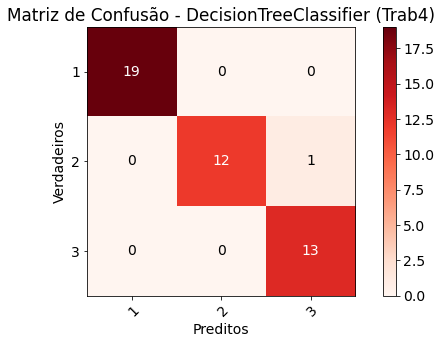

In [14]:
utils_trab3.plot_confusion_matrix(y_test, y_pred, title='Matriz de Confusão - DecisionTreeClassifier (Trab4)');

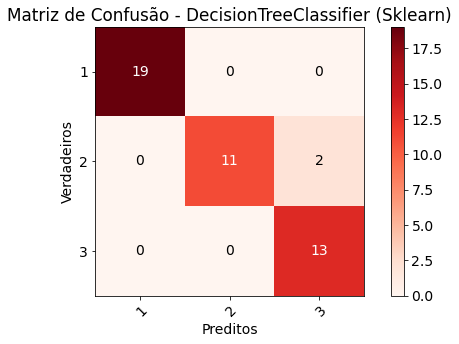

In [15]:
utils_trab3.plot_confusion_matrix(y_test, y_pred_, title='Matriz de Confusão - DecisionTreeClassifier (Sklearn)');

- As matrizes de confusão acima estão quase idênticas. O método da árvore de decisão do *Scikit-learn* errou duas vezes a classe 2, confundido-a com a classe 3, enquanto que o método impletamentado neste trabalho confundiu apenas uma vez a classe 2. 

### 2. Reportando o erro de classificação para o *k-fold* com *k* = 5

In [16]:
dt = tree.DecisionTreeClassifier()

print("Erro de classificação para o 5-fold: {}".format(utils_trab3.k_fold(X, y, k=5, method=dt)))

Erro de classificação para o 5-fold: 0.9333333333333332
